In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.signal as ss
from scipy import signal
import tensorflow as tf
import pickle
global df
from sklearn.preprocessing import StandardScaler
from scipy.integrate import simps
from matplotlib.mlab import psd

In [2]:
df = pd.read_csv(r"C:\Users\PRAMILA\Downloads\bci_new\pain\OpenBCI-RAW-2023-03-30_01-56-42.txt",skiprows=6,header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,204,-42732.55,12060.29,-35395.08,-40844.48,-35572.62,-44175.56,-29247.61,-36390.23,0.01,0.086,1.022,01:56:42.423,1680166602423
1,202,-42745.16,12032.64,-35410.46,-40875.04,-35591.24,-44199.54,-29354.25,-36433.14,0.00,0.000,0.000,01:56:42.447,1680166602447
2,211,-42794.69,12006.95,-35444.21,-40895.31,-35610.75,-44209.69,-29374.75,-36433.72,0.00,0.000,0.000,01:56:42.447,1680166602447
3,221,-42818.01,12008.14,-35446.60,-40896.85,-35593.05,-44216.60,-29671.85,-36441.14,0.00,0.000,0.000,01:56:42.447,1680166602447
4,219,-42765.84,12053.92,-35403.42,-40849.06,-35567.82,-44169.17,-29528.02,-36384.97,0.00,0.000,0.000,01:56:42.474,1680166602474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183996,51,-44270.71,9694.89,-35477.18,-44668.04,-34588.81,-41760.30,-27952.29,-38435.28,0.00,0.000,0.000,02:30:35.273,1680168635273
183997,52,-44315.95,9652.02,-35501.81,-44716.50,-34576.18,-41810.16,-27849.96,-38492.21,0.00,0.000,0.000,02:30:35.273,1680168635273
183998,53,-44290.45,9714.45,-35481.76,-44653.29,-34436.86,-41745.59,-27708.72,-38567.78,0.00,0.000,0.000,02:30:35.273,1680168635273
183999,54,-44284.39,9705.48,-35464.89,-44652.77,-34534.32,-41736.90,-27582.83,-38527.72,0.00,0.000,0.000,02:30:35.273,1680168635273


In [3]:

df.columns=['index','channel1','channel2','channel3','channel4','channel5','channel6','channel7','channel8','acc1','acc2','acc3','time_std','timestamp']
df.drop(['index'],axis=1,inplace=True)
df['seconds_from_start']=(df['timestamp']-df['timestamp'].iloc[0])/1000
df


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,acc1,acc2,acc3,time_std,timestamp,seconds_from_start
0,-42732.55,12060.29,-35395.08,-40844.48,-35572.62,-44175.56,-29247.61,-36390.23,0.01,0.086,1.022,01:56:42.423,1680166602423,0.000
1,-42745.16,12032.64,-35410.46,-40875.04,-35591.24,-44199.54,-29354.25,-36433.14,0.00,0.000,0.000,01:56:42.447,1680166602447,0.024
2,-42794.69,12006.95,-35444.21,-40895.31,-35610.75,-44209.69,-29374.75,-36433.72,0.00,0.000,0.000,01:56:42.447,1680166602447,0.024
3,-42818.01,12008.14,-35446.60,-40896.85,-35593.05,-44216.60,-29671.85,-36441.14,0.00,0.000,0.000,01:56:42.447,1680166602447,0.024
4,-42765.84,12053.92,-35403.42,-40849.06,-35567.82,-44169.17,-29528.02,-36384.97,0.00,0.000,0.000,01:56:42.474,1680166602474,0.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183996,-44270.71,9694.89,-35477.18,-44668.04,-34588.81,-41760.30,-27952.29,-38435.28,0.00,0.000,0.000,02:30:35.273,1680168635273,2032.850
183997,-44315.95,9652.02,-35501.81,-44716.50,-34576.18,-41810.16,-27849.96,-38492.21,0.00,0.000,0.000,02:30:35.273,1680168635273,2032.850
183998,-44290.45,9714.45,-35481.76,-44653.29,-34436.86,-41745.59,-27708.72,-38567.78,0.00,0.000,0.000,02:30:35.273,1680168635273,2032.850
183999,-44284.39,9705.48,-35464.89,-44652.77,-34534.32,-41736.90,-27582.83,-38527.72,0.00,0.000,0.000,02:30:35.273,1680168635273,2032.850


# 1.detrend

### before detrend

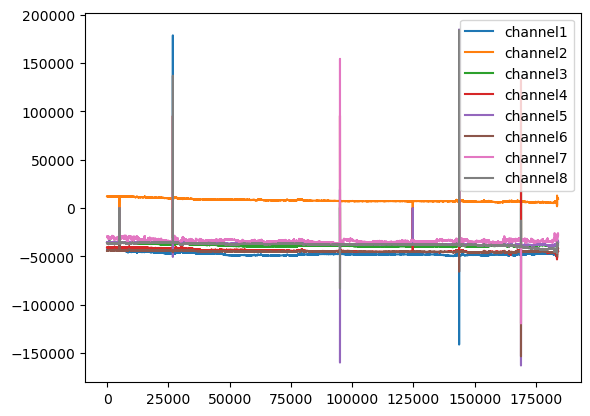

In [4]:
for column in df[['channel1', 'channel2','channel3', 'channel4','channel5', 'channel6','channel7', 'channel8']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')
plt.show()

### after detrend


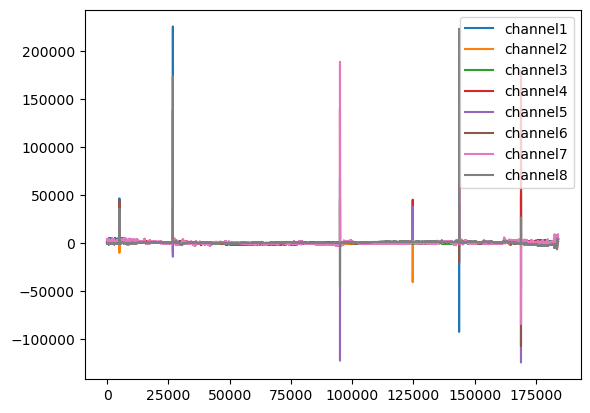

In [5]:

df['channel1'] = ss.detrend(df['channel1'])
df['channel2'] = ss.detrend(df['channel2'])
df['channel3'] = ss.detrend(df['channel3'])
df['channel4'] = ss.detrend(df['channel4'])
df['channel5'] = ss.detrend(df['channel5'])
df['channel6'] = ss.detrend(df['channel6'])
df['channel7'] = ss.detrend(df['channel7'])
df['channel8'] = ss.detrend(df['channel8'])

for column in df[['channel1', 'channel2','channel3', 'channel4','channel5', 'channel6','channel7', 'channel8']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')
plt.show()


In [6]:
print(df)


           channel1     channel2     channel3     channel4     channel5  \
0       3346.016183  1414.509139  1968.968197   742.333853    12.292629   
1       3333.421920  1386.886781  1953.603223   711.799748    -6.312419   
2       3283.907657  1361.224424  1919.868250   691.555643   -25.807467   
3       3260.603394  1362.442066  1917.493276   690.041537    -8.092514   
4       3312.789130  1408.249708  1960.688302   737.857432    17.152438   
...             ...          ...          ...          ...          ...   
183996  4703.357242  4135.168469  4651.641967  1683.328662  3747.245034   
183997  4658.132979  4092.326111  4627.026993  1634.894557  3759.889986   
183998  4683.648715  4154.783753  4647.092019  1698.130452  3899.224938   
183999  4689.724452  4145.841396  4663.977046  1698.676347  3801.779890   
184000  4644.000189  4086.959038  4605.882072  1626.932242  3775.444843   

           channel6     channel7     channel8  acc1   acc2   acc3  \
0       -130.450572  3710.2571

### resampling

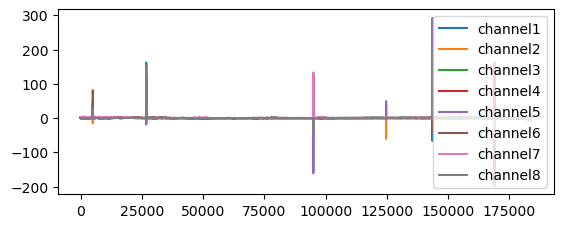

In [7]:
   
chan1 = (df['channel1']-np.mean(df['channel1']))/np.std(df['channel1'])
chan2 = (df['channel2']-np.mean(df['channel2']))/np.std(df['channel2'])
chan3 = (df['channel3']-np.mean(df['channel3']))/np.std(df['channel3'])
chan4 = (df['channel4']-np.mean(df['channel4']))/np.std(df['channel4'])
chan5 = (df['channel5']-np.mean(df['channel5']))/np.std(df['channel5'])
chan6 = (df['channel6']-np.mean(df['channel6']))/np.std(df['channel6'])
chan7 = (df['channel7']-np.mean(df['channel7']))/np.std(df['channel7'])
chan8 = (df['channel8']-np.mean(df['channel8']))/np.std(df['channel8'])

plt.figure(figsize=[6.4, 2.4]) 
i=1
for column in [chan1, chan2,chan3, chan4,chan5, chan6,chan7, chan8]:    
    plt.plot(column,label="channel"+str(i))
    plt.legend(loc='best')
    i+=1
    
plt.show()



### artifact/noise removal

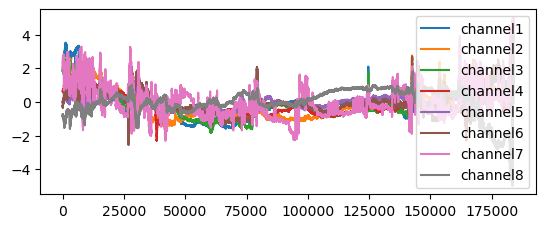

        channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0       2.406602  2.096649  1.886618  0.674445  0.016147 -0.239711  2.613555   
1       2.397544  2.055706  1.871895  0.646704 -0.008291 -0.283760  2.538444   
2       2.361931  2.017668  1.839571  0.628311 -0.033899 -0.302394  2.524010   
3       2.345170  2.019473  1.837296  0.626935 -0.010630 -0.315075  2.314736   
4       2.382704  2.087371  1.878684  0.670378  0.022530 -0.227903  2.416059   
...          ...       ...       ...       ...       ...       ...       ...   
183996  3.382862  0.000000  4.457091  1.529384  4.922079  0.000000  4.832762   
183997  3.350335  0.000000  4.433506  1.485379  4.938689  0.000000  4.904852   
183998  3.368687  0.000000  4.452731  1.542832  0.000000  0.000000  0.000000   
183999  3.373057  0.000000  4.468910  1.543328  4.993712  0.000000  0.000000   
184000  3.340170  0.000000  4.413245  1.478145  4.959120  0.000000  0.000000   

        channel8  acc1   acc2   acc3   

In [8]:
chan1[np.abs(chan1)>5] = 0
chan2[np.abs(chan2)>5] = 0
chan3[np.abs(chan3)>5] = 0
chan4[np.abs(chan4)>5] = 0
chan5[np.abs(chan5)>5] = 0
chan6[np.abs(chan6)>5] = 0
chan7[np.abs(chan7)>5] = 0
chan8[np.abs(chan8)>5] = 0

df['channel1'] = chan1
df['channel2'] = chan2
df['channel3'] = chan3
df['channel4'] = chan4
df['channel5'] = chan5
df['channel6'] = chan6
df['channel7'] = chan7
df['channel8'] = chan8

plt.figure(figsize=[6.4, 2.4]) 
for column in df[['channel1', 'channel2','channel3', 'channel4','channel5', 'channel6','channel7', 'channel8']]:    
    plt.plot(df[column],label=column)
    plt.legend(loc='best')
plt.show()
print(df)  





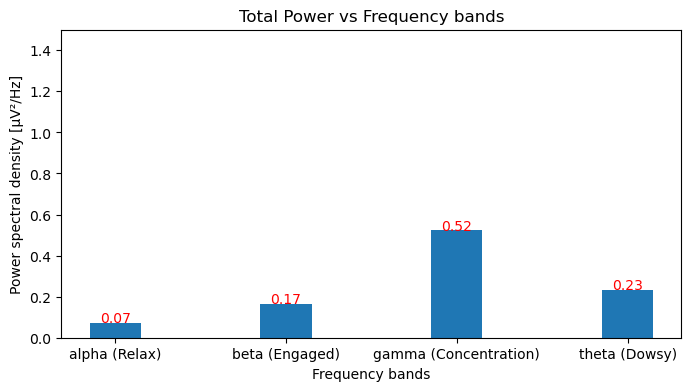

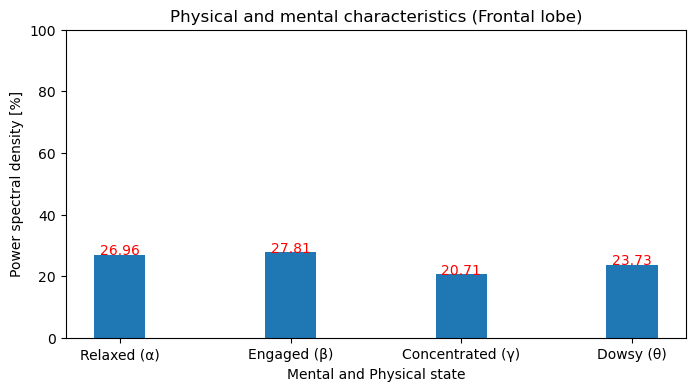

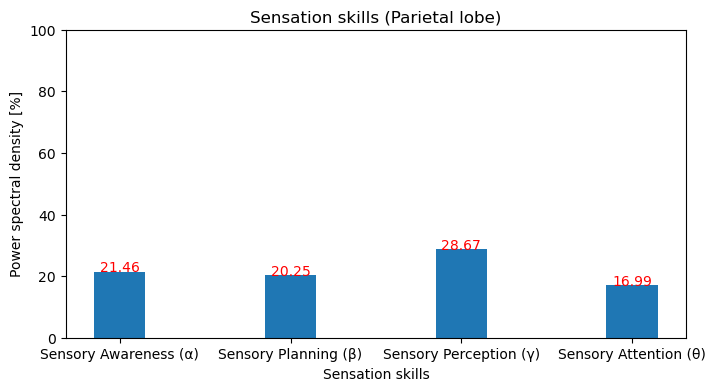

In [9]:

channels=['FP1','FP2','C3','C4','T5','T6','O1','O2']
fs=250
no=fs*2

alpha_power=[]
beta_power=[]
gamma_power=[]
theta_power=[]
delta_power=[]

def bandpower1(trace,band):
    f, psd = ss.welch(trace, fs=250,nperseg=no)
    #total_power1 = simps(psd, dx=0.1)
    psd /= np.sum(psd, axis=-1, keepdims=True)
    power = np.sum(psd[(f >= band[0]) & (f <= band[1])])
    return power

for column in df[['channel1', 'channel2','channel3', 'channel4','channel5', 'channel6','channel7', 'channel8']]:       
    alpha_power.append(bandpower1(df[column],[8,12]))
    beta_power.append(bandpower1(df[column],[12,30]))
    gamma_power.append(bandpower1(df[column],[30,100]))
    theta_power.append(bandpower1(df[column],[4,8]))
    delta_power.append(bandpower1(df[column],[0.5,4]))

plt.figure(figsize=[8,4]) 
plt.title("Total Power vs Frequency bands")
alpha_totalpower=np.sum(alpha_power)
beta_totalpower=np.sum(beta_power)
gamma_totalpower=np.sum(gamma_power)
delta_totalpower=np.sum(delta_power)
theta_totalpower=np.sum(theta_power)

bands=['alpha (Relax)','beta (Engaged)','gamma (Concentration)','theta (Dowsy)']
powers=[alpha_totalpower,beta_totalpower,gamma_totalpower,theta_totalpower]
#print(powers)
plt.bar(bands, powers,width = 0.3)
plt.xlabel("Frequency bands")
plt.ylabel("Power spectral density [μV²/Hz]")
plt.ylim([0,1.5])
for i in range(len(bands)):
    plt.text(i,powers[i],round(powers[i],2), ha = 'center', size=10,color= 'red')
plt.show()

plt.figure(figsize=[8,4]) 
plt.title("Physical and mental characteristics (Frontal lobe)")
bands=['Relaxed (α)','Engaged (β)','Concentrated (γ)','Dowsy (θ)']
percent_alpha=((alpha_power[0]+alpha_power[1])/alpha_totalpower)*100
percent_beta=((beta_power[0]+beta_power[1])/beta_totalpower)*100
percent_gamma=((gamma_power[0]+gamma_power[1])/gamma_totalpower)*100
percent_delta=((delta_power[0]+delta_power[1])/delta_totalpower)*100
percent_theta=((theta_power[0]+theta_power[1])/theta_totalpower)*100
powers=[percent_alpha,percent_beta,percent_gamma,percent_theta]

plt.bar(bands, powers,width = 0.3)

plt.xlabel("Mental and Physical state")
plt.ylabel("Power spectral density [%]")
plt.ylim([0,100])

for i in range(len(bands)):
    plt.text(i,powers[i],round(powers[i],2), ha = 'center', size=10,color= 'red')
    
plt.show()

plt.figure(figsize=[8,4]) 
plt.title("Sensation skills (Parietal lobe)")
bands=['Sensory Awareness (α)','Sensory Planning (β)','Sensory Perception (γ)','Sensory Attention (θ)']
percent_alpha=((alpha_power[2]+alpha_power[3])/alpha_totalpower)*100
percent_beta=((beta_power[2]+beta_power[3])/beta_totalpower)*100
percent_gamma=((gamma_power[2]+gamma_power[3])/gamma_totalpower)*100
percent_delta=((delta_power[2]+delta_power[3])/delta_totalpower)*100
percent_theta=((theta_power[2]+theta_power[3])/theta_totalpower)*100
powers=[percent_alpha,percent_beta,percent_gamma,percent_theta]

plt.bar(bands, powers,width = 0.3)

plt.xlabel("Sensation skills")
plt.ylabel("Power spectral density [%]")
plt.ylim([0,100])

for i in range(len(bands)):
    plt.text(i,powers[i],round(powers[i],2), ha = 'center', size=10,color= 'red')
    
plt.show()


## data formation for model training
combining approx 10 to 20 seconds time period readings of power for model training

In [10]:
fs=250
no=fs*2
def bandpower(trace,band):
    f, psd = ss.welch(trace, fs=250,nperseg=no)
    #total_power1 = simps(psd, dx=0.1)
    psd /= np.sum(psd, axis=-1, keepdims=True)
    power = np.sum(psd[(f >= band[0]) & (f <= band[1])])
    return power

#     [a1,f1]=ss.welch(df['channel1'], fs=250,nperseg=no)
#     #print(a1,f1)
#     total_power1 = simps(a1, dx=0.1)
#     #print(total_power1)
#     ap1 = simps(a1[(f1>band[0]) & (f1<band[1])], dx=0.1)
#     return ap1/total_power1
    
alpha = np.zeros((12,8))
beta = np.zeros((12,8))
gamma = np.zeros((12,8))
theta = np.zeros((12,8))
delta = np.zeros((12,8))

c=0
for i in np.arange(0,len(df),len(df)//10):
    print(i)
    X1=df['channel1']
    X2=df['channel2']
    X3=df['channel3']
    X4=df['channel4']
    X5=df['channel5']    
    X6=df['channel6']
    X7=df['channel7']
    X8=df['channel8']
    
    print(str(i)+" : "+str(i+len(df)//10))
    end=i+len(df)//10
    X1=X1[i:end]
    X2=X2[i:end]
    X3=X3[i:end]
    X4=X4[i:end]
    X5=X5[i:end]
    X6=X6[i:end]
    X7=X7[i:end]  
    X8=X8[i:end] 
    
    alpha[c,0] = bandpower(X1,[8,12])
    alpha[c,1] = bandpower(X2,[8,12])
    alpha[c,2] = bandpower(X3,[8,12])
    alpha[c,3] = bandpower(X4,[8,12])
    alpha[c,4] = bandpower(X5,[8,12])
    alpha[c,5] = bandpower(X6,[8,12])
    alpha[c,6] = bandpower(X7,[8,12])
    alpha[c,7] = bandpower(X8,[8,12])
    
    beta[c,0] = bandpower(X1,[12,30])
    beta[c,1] = bandpower(X2,[12,30])
    beta[c,2] = bandpower(X3,[12,30])
    beta[c,3] = bandpower(X4,[12,30])
    beta[c,4] = bandpower(X5,[12,30])
    beta[c,5] = bandpower(X6,[12,30])
    beta[c,6] = bandpower(X7,[12,30])
    beta[c,7] = bandpower(X8,[12,30])

        
    gamma[c,0] = bandpower(X1,[30,100])
    gamma[c,1] = bandpower(X2,[30,100])
    gamma[c,2] = bandpower(X3,[30,100])
    gamma[c,3] = bandpower(X4,[30,100])
    gamma[c,4] = bandpower(X5,[30,100])
    gamma[c,5] = bandpower(X6,[30,100])
    gamma[c,6] = bandpower(X7,[30,100])
    gamma[c,7] = bandpower(X8,[30,100])
    
        
    theta[c,0] = bandpower(X1,[4,7])
    theta[c,1] = bandpower(X2,[4,7])
    theta[c,2] = bandpower(X3,[4,7])
    theta[c,3] = bandpower(X4,[4,7])
    theta[c,4] = bandpower(X5,[4,7])
    theta[c,5] = bandpower(X6,[4,7])
    theta[c,6] = bandpower(X7,[4,7])
    theta[c,7] = bandpower(X8,[4,7])

    delta[c,0] = bandpower(X1,[0.5,4])
    delta[c,1] = bandpower(X2,[0.5,4])
    delta[c,2] = bandpower(X3,[0.5,4])
    delta[c,3] = bandpower(X4,[0.5,4])
    delta[c,4] = bandpower(X5,[0.5,4])
    delta[c,5] = bandpower(X6,[0.5,4])
    delta[c,6] = bandpower(X7,[0.5,4])
    delta[c,7] = bandpower(X8,[0.5,4])
    
    c+=1
    
alpha_bands = pd.DataFrame(alpha, columns = ['alpha_power_1','alpha_power_2','alpha_power_3','alpha_power_4','alpha_power_5','alpha_power_6','alpha_power_7','alpha_power_8'])
beta_bands = pd.DataFrame(beta, columns = ['beta_power_1','beta_power_2','beta_power_3','beta_power_4','beta_power_5','beta_power_6','beta_power_7','beta_power_8'])
gamma_bands = pd.DataFrame(gamma, columns = ['gamma_power_1','gamma_power_2','gamma_power_3','gamma_power_4','gamma_power_5','gamma_power_6','gamma_power_7','gamma_power_8'])
theta_bands = pd.DataFrame(theta, columns = ['theta_power_1','theta_power_2','theta_power_3','theta_power_4','theta_power_5','theta_power_6','theta_power_7','theta_power_8'])
delta_bands = pd.DataFrame(delta, columns = ['delta_power_1','delta_power_2','delta_power_3','delta_power_4','delta_power_5','delta_power_6','delta_power_7','delta_power_8'])


df_combined = pd.concat([alpha_bands,beta_bands,gamma_bands,theta_bands,delta_bands], axis=1)
print(df_combined)
df_combined.to_csv("eeg_trainingdatacombined.csv")

0
0 : 18400
18400
18400 : 36800
36800
36800 : 55200
55200
55200 : 73600
73600
73600 : 92000
92000
92000 : 110400
110400
110400 : 128800
128800
128800 : 147200
147200
147200 : 165600
165600
165600 : 184000
184000
184000 : 202400
    alpha_power_1  alpha_power_2  alpha_power_3  alpha_power_4  alpha_power_5  \
0        0.007641       0.011224       0.009326       0.006760       0.007822   
1        0.011367       0.017240       0.012644       0.012700       0.016082   
2        0.009049       0.013329       0.012126       0.003021       0.016620   
3        0.012026       0.013025       0.011381       0.009010       0.016211   
4        0.004167       0.004113       0.003770       0.002967       0.005061   
5        0.032181       0.034300       0.036114       0.032552       0.042389   
6        0.041016       0.047317       0.049729       0.064560       0.062216   
7        0.003895       0.003990       0.003508       0.004775       0.003156   
8        0.006023       0.005740       0.00

C:\Users\PRAMILA\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 500 is greater than input length  = 1, using nperseg = 1
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\PRAMILA\AppData\Local\Temp\ipykernel_2800\525286340.py:6: RuntimeWarning: invalid value encountered in divide
  psd /= np.sum(psd, axis=-1, keepdims=True)


# we can use eeg_trainingdatacombined.csv in the eeg_models notebook for training